In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [18]:
train_data = pd.read_csv("F:/Machine Learning/Data Science Projects/Sentiment_Analysis/archive/train.csv",encoding='latin-1')
test_data = pd.read_csv("F:/Machine Learning/Data Science Projects/Sentiment_Analysis/archive/test.csv",encoding='latin-1') 

In [19]:
train_data.head(2)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105


In [20]:
# I believe test data y is given, we need to check our accuracy wrt to the data
test_data_data.head(2)

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0


In [35]:
X_train = train_data.drop(["sentiment"],axis=1)
y_train = train_data["sentiment"]

In [38]:
X_test = test_data.drop(["sentiment"],axis=1)
y_test = test_data["sentiment"]

In [39]:
y_train.unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [41]:
y_test.value_counts()

neutral     1430
positive    1103
negative    1001
Name: sentiment, dtype: int64

In [42]:
y_test.shape
#70-80% of the data is only having y column

(4815,)

In [43]:
print(len(X_train.columns))
print(len(X_test.columns))

9
8


In [44]:
print(X_train.columns)
print(X_test.columns)

Index(['textID', 'text', 'selected_text', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'],
      dtype='object')
Index(['textID', 'text', 'Time of Tweet', 'Age of User', 'Country',
       'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'],
      dtype='object')


In [45]:
# there is no column named as selected_text in the train dataset but that column is not present in test dataset so ideally we should remove that column for the project

In [46]:
#dropping column selected_text
X_train.drop(["selected_text"],axis=1,inplace=True)

In [47]:
print(len(X_train.columns))
print(len(X_test.columns))

8
8


In [49]:
print(X_train["textID"].nunique())
print(len(X_train["textID"]))
# each entry is a unique text id so each comment is unique (good for the model no bias)

27481
27481


In [50]:
X_train.head(2)

,textID,text,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going",morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,noon,21-30,Albania,2877797,27400.0,105


<Axes: >

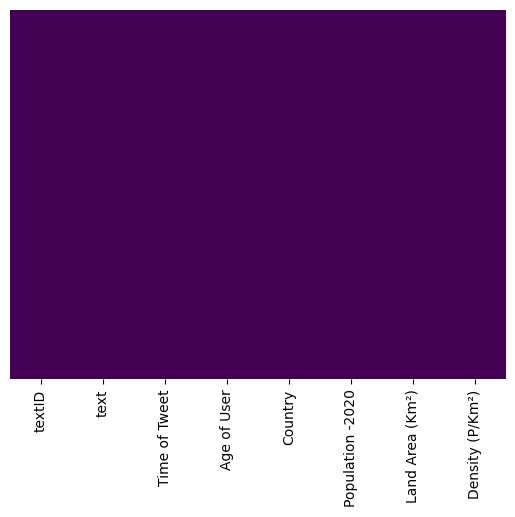

In [52]:
#NULL Data Check
sns.heatmap(X_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#Fully populated data (hurray!)

In [53]:
X_train["Time of Tweet"].value_counts()
# equal distribution of tweets in morning, noon and night

morning    9161
noon       9160
night      9160
Name: Time of Tweet, dtype: int64

In [54]:
X_train["Age of User"].value_counts()
# equally distributed in ages

0-20      4581
21-30     4580
31-45     4580
46-60     4580
60-70     4580
70-100    4580
Name: Age of User, dtype: int64

In [55]:
X_train["Country"].value_counts()
#almost equally distributed

Afghanistan                 149
Czechia (Czech Republic)    149
Egypt                       149
Ecuador                     149
Dominica                    149
                           ... 
Seychelles                  127
Sierra Leone                127
Singapore                   127
Slovakia                    127
Zimbabwe                    127
Name: Country, Length: 195, dtype: int64

In [58]:
#1 Try sentiment analysis on the text column by using Bag of Words representation
X_train["text"].count()

27480

In [61]:
X_train["text"].head(6)
# the text definitely needs cleaning (some links some * (* does not needs to be removed)), but needs to be cautious because sentiment can be affected by sequence modelling

0                  I`d have responded, if I were going
1        Sooo SAD I will miss you here in San Diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     Sons of ****, why couldn`t they put them on t...
5    http://www.dothebouncy.com/smf - some shameles...
Name: text, dtype: object

In [ ]:
# Data_cleaning process

In [124]:
def remove_links(text):
    text = str(text)  #some entries were not text, so converted them to text
    # Define a regular expression pattern to match URLs
    url_pattern = r'https?://[^\s\n\r]+'  # this is a particular pattern for removing links in text\
    text_without_links = re.sub(url_pattern, '', text)
    text_without_links_v2 = re.sub(r'#', '', text_without_links) # remove hashes 
    text_without_links_v2 = re.sub(r'\.{3,}$', '', text_without_links_v2) # remove trailing multiple ....
    text_without_links_v2 = text_without_links_v2.strip() # removing trailing and start blanks
    text_without_links_v2 = text_without_links_v2.lower() # to remove the additional dimensionality that might come
    
    return text_without_links_v2

In [125]:
X_train.drop(["cleaned_text"],inplace=True, axis =1)

In [126]:
X_train["cleaned_text"] = X_train["text"].apply(lambda x: remove_links(x))

In [127]:
X_train["cleaned_text"].head(6)

0                                           i`d have responded, if i were going
1                                 sooo sad i will miss you here in san diego!!!
2                                                        my boss is bullying me
3                                                what interview! leave me alone
4    sons of ****, why couldn`t they put them on the releases we already bought
5                 - some shameless plugging for the best rangers forum on earth
Name: cleaned_text, dtype: object

In [128]:
pd.set_option('display.max_colwidth', None)

In [129]:
X_train["cleaned_text"].head(6)

0                                           i`d have responded, if i were going
1                                 sooo sad i will miss you here in san diego!!!
2                                                        my boss is bullying me
3                                                what interview! leave me alone
4    sons of ****, why couldn`t they put them on the releases we already bought
5                 - some shameless plugging for the best rangers forum on earth
Name: cleaned_text, dtype: object